# LIFE EXPECTANCY AND GDP

## General
I. The project goals are to extend the life expectancy.

II. Action:
Develop GDP to extend the life expectancy.

III. Data: The countries' data about years, ages, and GDPs.

IV. Analysis:

1. What are the average LE and GDP by country?
2. Does GDP and LE increase over time?
3. What is the relationship between life and GDP?
4. Does the Country affect GDP and LE?

## Looking Over the Data

1. Import Python modules and read data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
gdp_data = pd.read_csv("all_data.csv")

# Rename column
gdp_data.rename(columns={'Life expectancy at birth (years)': 'Age'}, inplace = True)
gdp_data['GDP_log'] = np.log10(gdp_data['GDP'])
print(gdp_data.head(10))
gdp_data.dtypes


  Country  Year   Age           GDP    GDP_log
0   Chile  2000  77.3  7.786093e+10  10.891320
1   Chile  2001  77.3  7.097992e+10  10.851136
2   Chile  2002  77.8  6.973681e+10  10.843462
3   Chile  2003  77.9  7.564346e+10  10.878771
4   Chile  2004  78.0  9.921039e+10  10.996557
5   Chile  2005  78.4  1.229650e+11  11.089782
6   Chile  2006  78.9  1.547880e+11  11.189737
7   Chile  2007  78.9  1.736060e+11  11.239565
8   Chile  2008  79.6  1.796380e+11  11.254398
9   Chile  2009  79.3  1.723890e+11  11.236510


Country     object
Year         int64
Age        float64
GDP        float64
GDP_log    float64
dtype: object

2. Find name of countries and span of years

In [3]:
countries = gdp_data.Country.unique()
print(countries)

print(sorted(gdp_data.Year.unique()))

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


3. Generate summary stats by Country

In [4]:
gdp_data.groupby('Country').describe()

Year                                             \
                         count    mean       std     min      25%     50%   
Country                                                                     
Chile                     16.0  2007.5  4.760952  2000.0  2003.75  2007.5   
China                     16.0  2007.5  4.760952  2000.0  2003.75  2007.5   
Germany                   16.0  2007.5  4.760952  2000.0  2003.75  2007.5   
Mexico                    16.0  2007.5  4.760952  2000.0  2003.75  2007.5   
United States of America  16.0  2007.5  4.760952  2000.0  2003.75  2007.5   
Zimbabwe                  16.0  2007.5  4.760952  2000.0  2003.75  2007.5   

                                            Age            ...           GDP  \
                              75%     max count      mean  ...           75%   
Country                                                    ...                 
Chile                     2011.25  2015.0  16.0  78.94375  ...  2.449515e+11   
China                     2011.25  2015.0  16.0  74.26250  ...  7.819550e+12   
Germany                   2011.25  2015.0  16.0  79.65625  ...  3.596078e+12   
Mexico                    2011.25  2015.0  16.0  75.71875  ...  1.156992e+12   
United States of America  2011.25  2015.0  16.0  78.06250  ...  1.567500e+13   
Zimbabwe                  2011.25  2015.0  16.0  50.09375  ...  1.263446e+10   

                                       GDP_log                       \
                                   max   count       mean       std   
Country                                                               
Chile                     2.783840e+11    16.0  11.180333  0.224071   
China                     1.106470e+13    16.0  12.578339  0.342054   
Germany                   3.890610e+12    16.0  12.479788  0.103750   
Mexico                    1.298460e+12    16.0  11.980012  0.095844   
United States of America  1.810000e+13    16.0  13.142147  0.077161   
Zimbabwe                  1.630467e+10    16.0   9.914099  0.196640   

                                                                      \
                                min        25%        50%        75%   
Country                                                                
Chile                     10.843462  10.970248  11.238037  11.389017   
China                     12.083270  12.273464  12.606542  12.892557   
Germany                   12.290023  12.437334  12.531004  12.555695   
Mexico                    11.834833  11.882518  12.001567  12.063320   
United States of America  13.012837  13.082603  13.159865  13.195128   
Zimbabwe                   9.645000   9.759539   9.828243  10.100444   

                                     
                                max  
Country                              
Chile                     11.444644  
China                     13.043940  
Germany                   12.590018  
Mexico                    12.113429  
United States of America  13.257679  
Zimbabwe                  10.212312  

[6 rows x 32 columns]

## More insight about GPD and LE

4. What are the average LE and GDP by country?

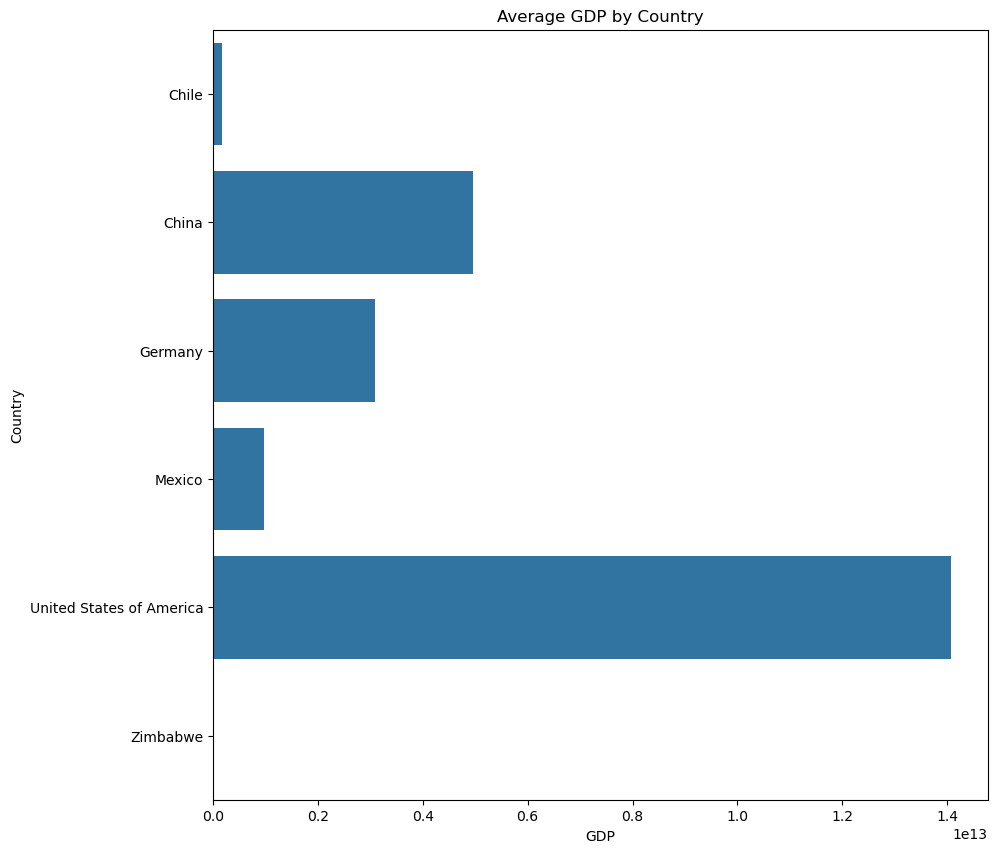

<Figure size 640x480 with 0 Axes>

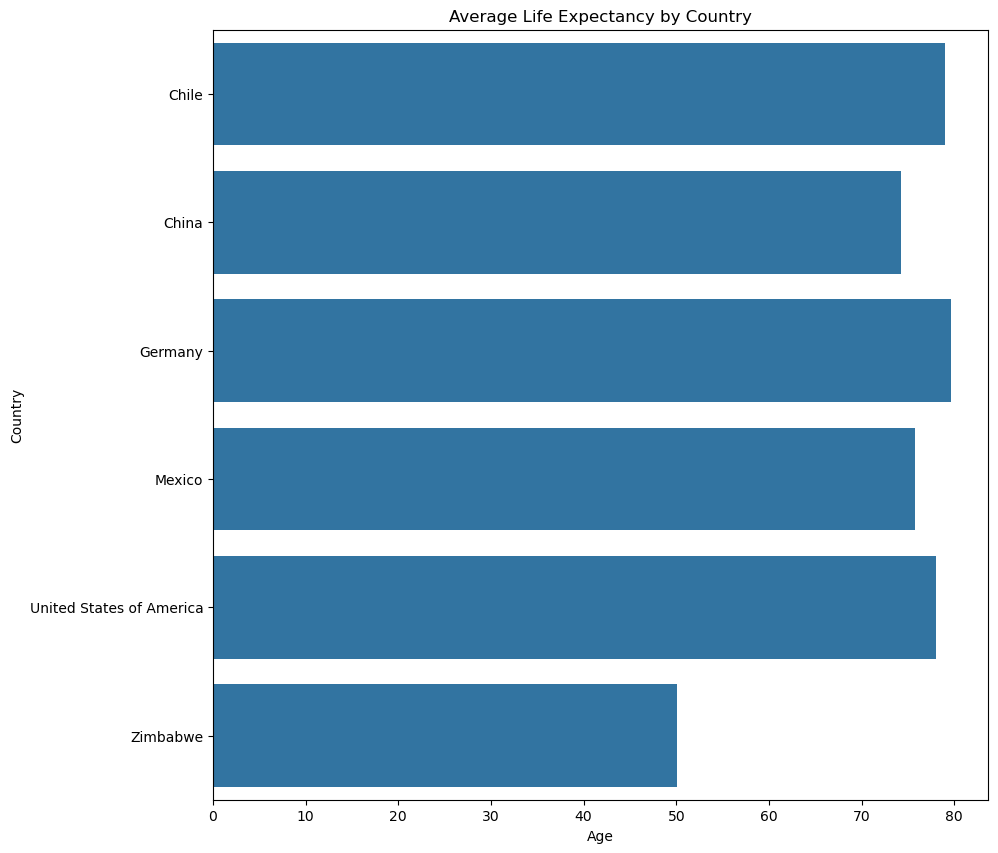

In [16]:
df_means = gdp_data.groupby('Country').mean()

# Average GDP by Country
plt.figure(figsize=(10,10))
sns.barplot(data=df_means, x="GDP", y=df_means.index)
plt.title("Average GDP by Country")
plt.show()
plt.clf()

# Average Life Expectancy by Country
plt.figure(figsize=(10,10))
sns.barplot(data=df_means, x="Age", y=df_means.index)
plt.title("Average Life Expectancy by Country")
plt.show()

5. Does GDP and LE increase over time?

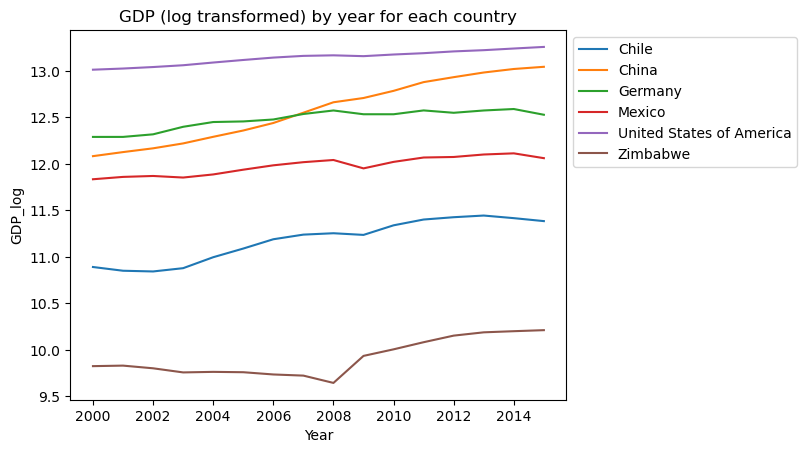

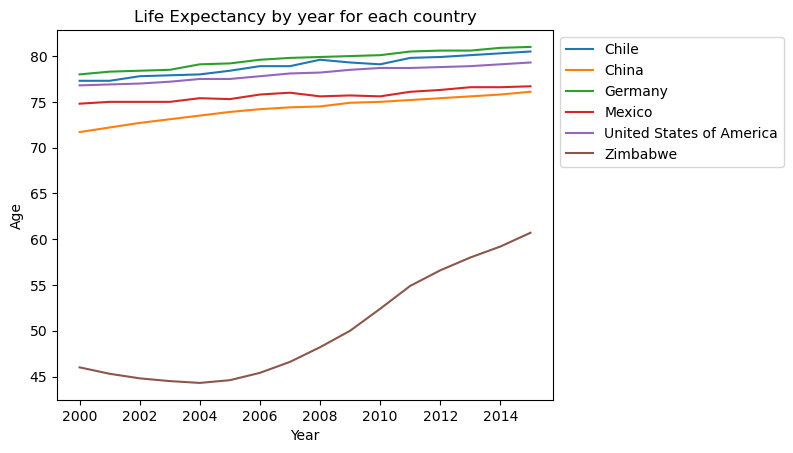

<Figure size 640x480 with 0 Axes>

In [6]:
# Plot the change of Life expectancy and GDP by years.
# Change of GDP by Years
sns.lineplot(x='Year', y='GDP_log', data=gdp_data, hue='Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("GDP (log transformed) by year for each country")
plt.show()
plt.clf()

# Change of Life Exptectancy by Years
sns.lineplot(x='Year', y='Age', data=gdp_data, hue='Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Life Expectancy by year for each country")
plt.show()
plt.clf()

## Find out more insight relationship about Life expectancy and GDP

6. Which is relationship between life and GDP?

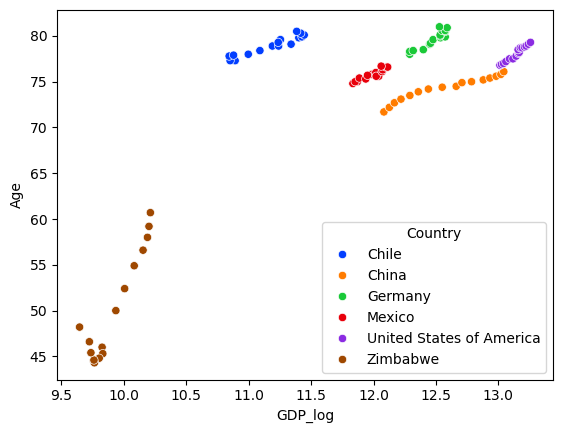

<Figure size 640x480 with 0 Axes>

In [7]:
sns.scatterplot(x=gdp_data['GDP_log'], y=gdp_data['Age'], hue = gdp_data['Country'], palette = 'bright')
plt.show()
plt.clf()

The plot here shows that increase in GDP, the LE also increases. Therefore, to increase LE, the countries should increase their GPD.

To find out more relationship between LE and GDP, we will provide insight into LE and GDP in each country.

## Plots showing LE vs GDP by countries

7. Does Country effect GDP and LE?

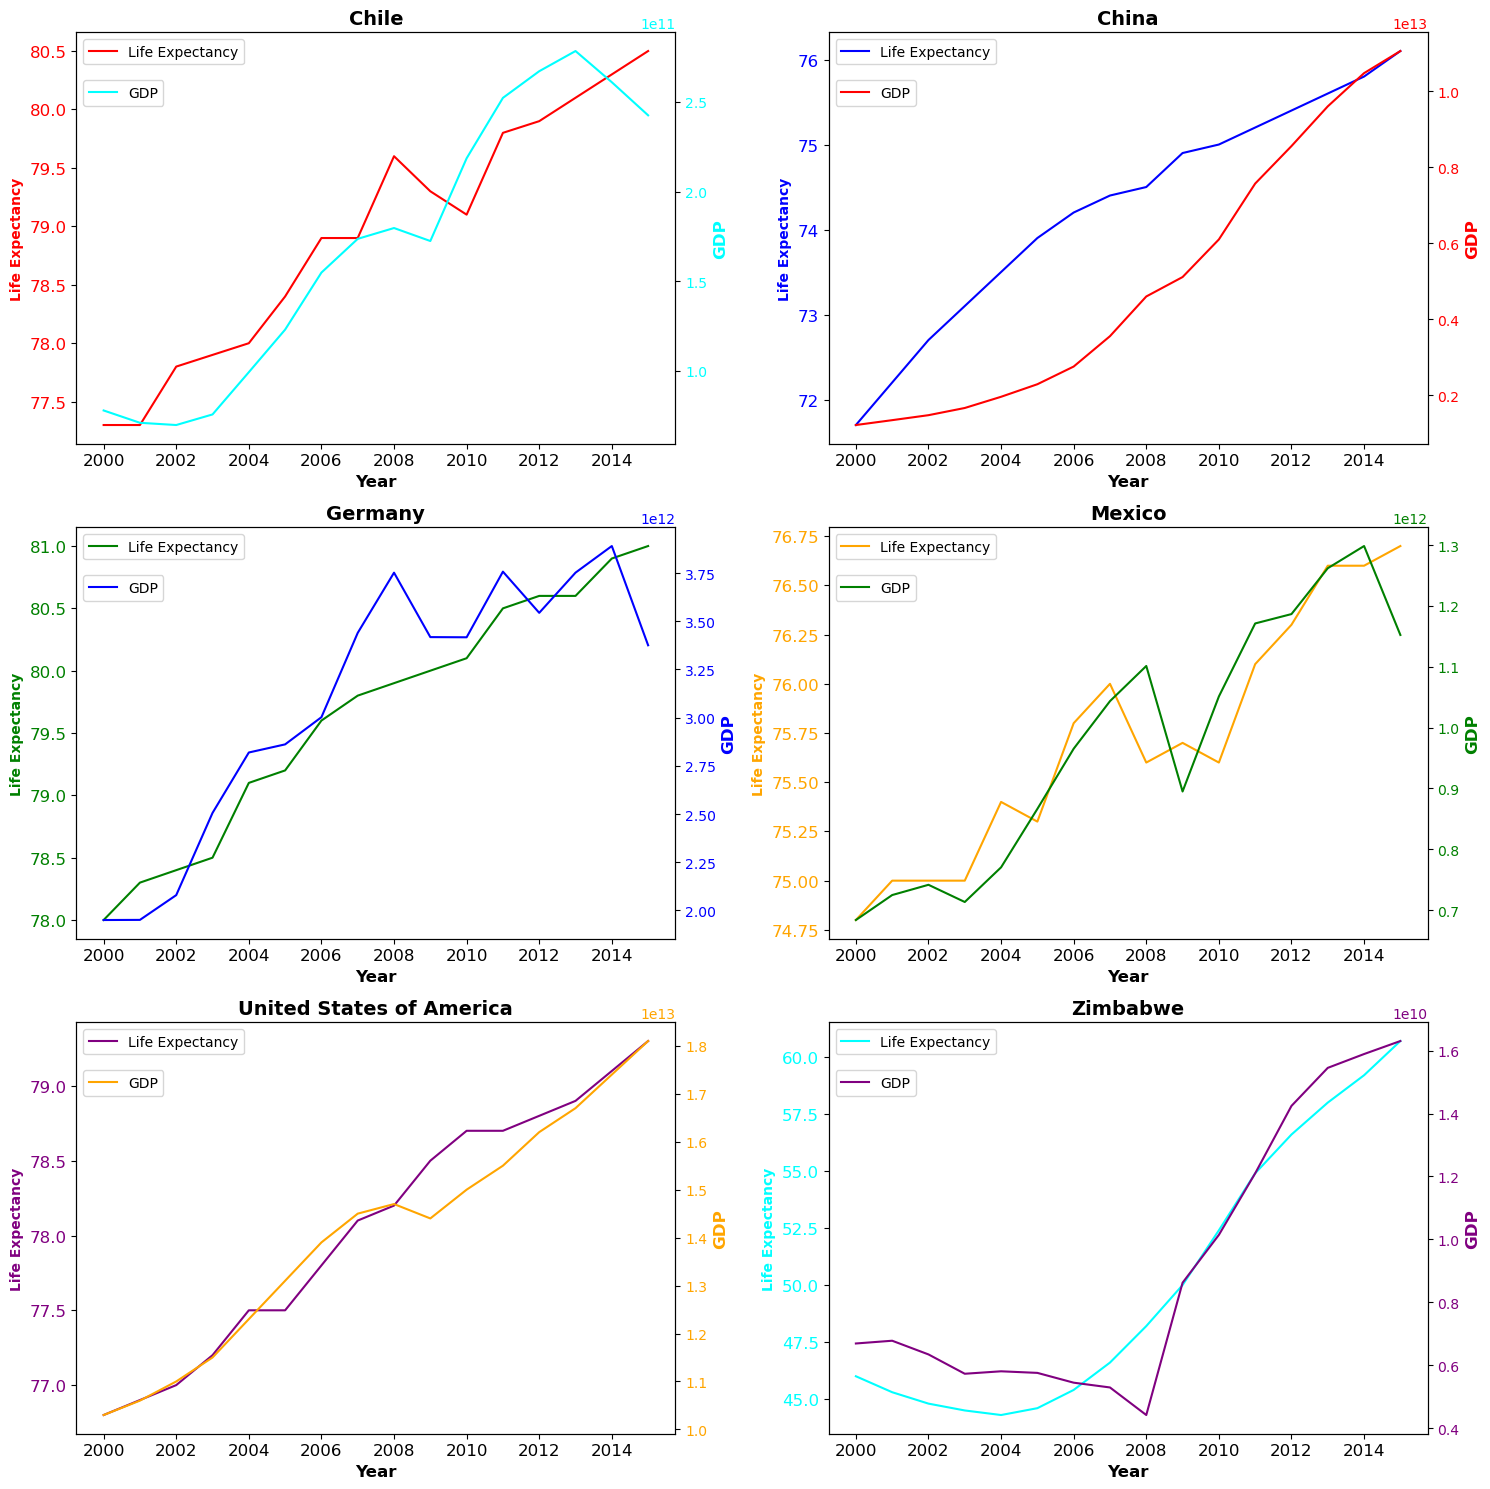

In [17]:
num_plots = len(countries)
rows = 3
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,15))
line_colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
for i, country in enumerate(countries):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    country_data = gdp_data[gdp_data['Country'] == country]
    color = line_colors[i]  

    ax.plot(country_data['Year'], country_data['Age'], label='Life Expectancy', color=color)
    ax.set_ylabel('Life Expectancy', color=color, fontweight='bold')
    ax.tick_params(axis='y', labelcolor=color)
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    
    color = line_colors[i-1] 
    ax_twin = ax.twinx()
    ax_twin.plot(country_data['Year'], country_data['GDP'], label='GDP', color=color)
    ax_twin.set_ylabel('GDP', color=color, fontsize=12, fontweight='bold')
    ax_twin.tick_params(axis='y', labelcolor=color, labelsize=10)
    
    ax.set_title(country, fontsize=14, fontweight='bold')
    ax.legend(loc='upper left')
    ax_twin.legend(loc='upper left', bbox_to_anchor=(0, .9))
    ax.tick_params(labelsize=12) 
    
plt.tight_layout()
plt.savefig('gdp_vs_le.png')
plt.show()

## Conclusion

1. What did you learn throughout the process?
- The plot shows Life Expectancy and GDP are connected, as GDP goes up and down, LE follows.
- Interestingly Zimbabwe showing almost non-existent on the other plots does show, that there is a huge increase in LE along with an increase in GDP. LE is from a low of 45 years to 60+ in 7 years, and an increase in GDP from around 0.4 billion GDP to 1.6 billion.
- Though Zimbabwe is behind the rest of the countries in the data relatively, they are showing huge improvements.

2. Are the results what you expected?
- Yes, these are.

3. What are the key findings and takeaways?
- To expand life expectancy, the countries should grow their GDP.